## Fraude de cartão de crédito

### Fonte de Dados:

- Os pagamentos digitais estão evoluindo, mas os criminosos cibernéticos também.

- De acordo com o Data Breach Index, mais de 5 milhões de registros são roubados diariamente, uma estatística preocupante que mostra - a fraude ainda é muito comum tanto para pagamentos do tipo Cartão-Presente quanto Cartão-Não Presente.

- No mundo digital de hoje, onde trilhões de transações com cartões acontecem por dia, a detecção de fraudes é um desafio.


### Explicação do das variáveis:

* **distancefromhome** - a distância de casa onde a transação aconteceu.

* **distancefromlast_transaction** - a distância da última transação aconteceu.

* **ratiotomedianpurchaseprice** - Razão da transação do preço de compra para o preço de compra mediano.

* **repeat_retailer** - É a transação que aconteceu do mesmo varejista.

* **used_chip** - É a transação através de chip (cartão de crédito).

* **usedpinnumber** - A transação aconteceu usando o número PIN.

* **online_order** - A transação é um pedido online.

* **fraude** - A transação é fraudulenta.

## Subindo a base de dados:

Importação de bibliotecas

In [37]:
import pandas as pd # Para trabalhar com dados tabulares
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score #métrica de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
import warnings #remoção de avisos

In [38]:
dados = pd.read_csv('card_transdata.csv', sep=',') 

In [39]:
dados.head(3) # analisando os primeiros dados

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


In [40]:
dados.shape 

(96225, 8)

## Tratando inconsistências na base

In [41]:
dados.isnull().sum() 

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      1
fraud                             1
dtype: int64

In [42]:
dados = dados.dropna()

## Análise exploratória dos dados

In [43]:
dados.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,96224.000000,96224.000000,96224.000000,96224.000000,96224.000000,96224.000000,96224.000000,96224.000000
mean,26.704591,5.028515,1.817389,0.882358,0.350973,0.103166,0.650856,0.086943
std,65.423689,24.524979,2.921524,0.322186,0.477277,0.304177,0.476702,0.281753
min,0.021322,0.000488,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.866557,0.295788,0.476037,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.963299,0.996695,0.995654,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.714416,3.333866,2.084090,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
#Número de transações fraudulentas
dados[dados["fraud"] == 1].fraud.count() #filtro com contagem dos dados

8366

In [45]:
Total = len(dados)
Total

96224

In [46]:
Total = len(dados)
TotalNaoFraudes = dados[dados["fraud"] == 0].fraud.count()
TotalFraudes = dados[dados["fraud"] == 1].fraud.count()

Percentual_Fraudes = TotalFraudes / Total 

print("Total de dados: ", Total)
print("Total de não fraudes: ", TotalNaoFraudes)
print("Total de fraudes: ", TotalFraudes)
print("Percentual de fraudes na base: ", (round(Percentual_Fraudes, 2)*100), "%")

Total de dados:  96224
Total de não fraudes:  87858
Total de fraudes:  8366
Percentual de fraudes na base:  9.0 %


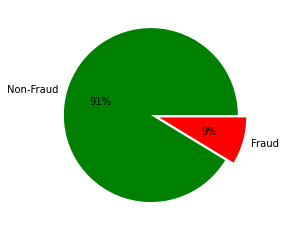

In [47]:
categororias = ["Non-Fraud", "Fraud"]
plt.pie(dados["fraud"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()

In [48]:
dados_fraudes = dados[dados["fraud"] == 1]

In [49]:
dados_fraudes.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0


In [50]:
dados_fraudes.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,8366.0,66.476197,128.875552,0.042333,4.555549,15.256373,102.52234,3010.167028
distance_from_last_transaction,8366.0,12.773924,55.066288,0.000488,0.327273,1.163287,4.71155,2160.499922
ratio_to_median_purchase_price,8366.0,5.970805,6.297597,0.032955,3.050923,4.998334,7.23532,266.689692
repeat_retailer,8366.0,0.880110,0.324852,0.000000,1.000000,1.000000,1.00000,1.000000
used_chip,8366.0,0.255319,0.436067,0.000000,0.000000,0.000000,1.00000,1.000000
used_pin_number,8366.0,0.003466,0.058778,0.000000,0.000000,0.000000,0.00000,1.000000
online_order,8366.0,0.948841,0.220336,0.000000,1.000000,1.000000,1.00000,1.000000
fraud,8366.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000


<Axes: xlabel='online_order', ylabel='count'>

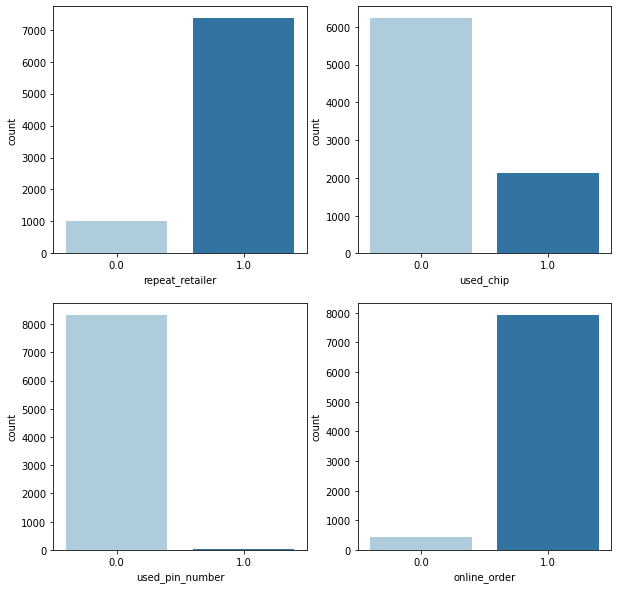

In [51]:
plt.figure(figsize = (10,10)) #Configurando o tamanho da visualização

plt.subplot(2,2,1)
sns.countplot(x = "repeat_retailer", palette = "Paired", data = dados_fraudes) #Aconteceu no mesmo varejista?

plt.subplot(2,2,2)
sns.countplot(x = "used_chip", palette = "Paired", data = dados_fraudes) #Uso de cartão de crédito?

plt.subplot(2,2,3)
sns.countplot(x = "used_pin_number", palette = "Paired", data = dados_fraudes) #Utilizou o mesmo número de PIN?

plt.subplot(2,2,4)
sns.countplot(x = "online_order", palette = "Paired", data = dados_fraudes) #Foi em uma compra online?

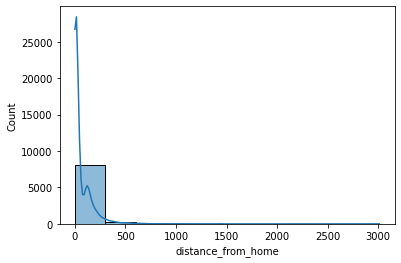

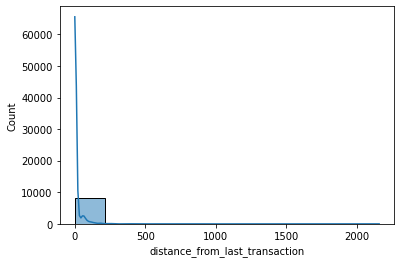

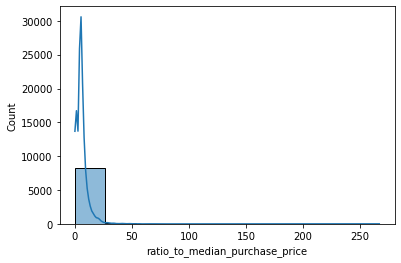

In [52]:
Colunas_Numericas = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in Colunas_Numericas:
    plt.figure()
    plot = dados_fraudes[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

In [53]:
for column in [0, 1, 2]:
    dados_fraudes.iloc[:, column] = np.log10(dados_fraudes.iloc[:, column]) #transformação logarítma

<ipython-input-53-608d89acdf78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_fraudes.iloc[:, column] = np.log10(dados_fraudes.iloc[:, column]) #transformação logarítma
<ipython-input-53-608d89acdf78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_fraudes.iloc[:, column] = np.log10(dados_fraudes.iloc[:, column]) #transformação logarítma
<ipython-input-53-608d89acdf78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

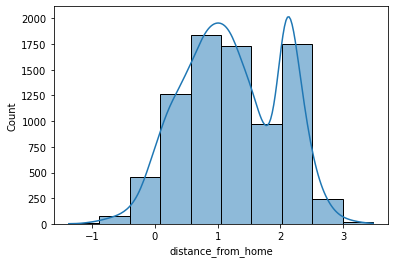

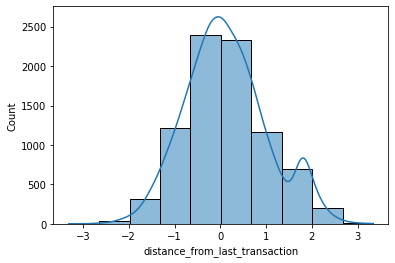

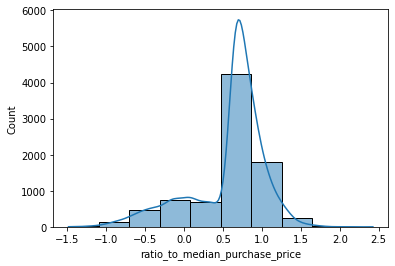

In [54]:
Colunas_Numericas_Normal = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in Colunas_Numericas_Normal:
    plt.figure()
    plot = dados_fraudes[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

In [55]:
round(dados_fraudes.distance_from_last_transaction.mean(),2)

0.13

In [56]:
round(dados_fraudes.distance_from_last_transaction.std(),2)

0.91

<Axes: >

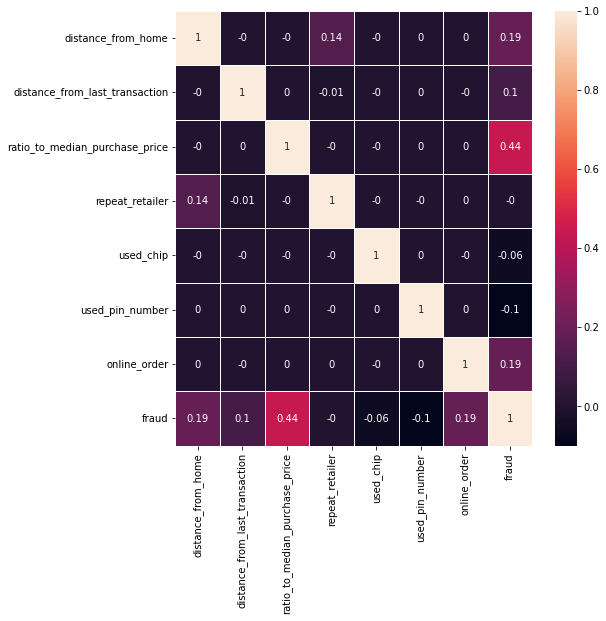

In [57]:
correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

## Criação do modelo de Machine Learming

### Separação da base de treino e teste

In [58]:
x = dados[['distance_from_home','ratio_to_median_purchase_price', 'online_order']]
y = dados['fraud'] #target

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,
                                                    random_state=7) #20% para teste e 80% de treino

### Feature Engineer

Comparação da escala normal das variáveis vs. escalonamento das variáveis

- Comparação do real x dados transformado (normalização e padronização)
* padronização: zera a média e deixa o desvio padrão unitário.( obteremos desvios-padrão menores por meio do processo de normalização minmaxscaler).
* normalização: coloca a variável na escala entre 0 até 1.

- Análise da plotagem real e verificar se está muito diferente da plotagem com standerscaler e minmaxsclaer.
- Escolha o tipo de transformação de escala que melhor se adequa a suas variáveis. Se o desenho do gráfico mudar, você está descaracterizando o dado.

Transformar e normlaizar a escala das variáveis.

In [60]:
#scaler = StandardScaler() 
scaler = MinMaxScaler() 
scaler.fit(x_train)

MinMaxScaler()

In [61]:
# Na hora de transformar, devemos transformar ambos os conjuntos
x_train_escalonado = scaler.transform(x_train)#treino
x_test_escalonado = scaler.transform(x_test)#teste

In [62]:
x_train

,distance_from_home,ratio_to_median_purchase_price,online_order
31416,8.217716,1.248510,1.0
78734,19.611956,0.589224,0.0
5755,2.449974,0.436354,1.0
1038,22.542248,2.753600,0.0
65528,11.847201,2.559804,1.0
...,...,...,...
10941,6.177880,5.253243,1.0
28048,15.877986,0.446551,1.0
85824,8.522403,0.202278,0.0
52678,2.757733,1.542217,1.0


In [63]:
x_train_escalonado

array([[1.78144140e-03, 4.63837920e-03, 1.00000000e+00],
       [4.25791731e-03, 2.16616665e-03, 0.00000000e+00],
       [5.27854228e-04, 1.59292657e-03, 1.00000000e+00],
       ...,
       [1.84766347e-03, 7.15178371e-04, 0.00000000e+00],
       [5.94744103e-04, 5.73973435e-03, 1.00000000e+00],
       [1.79102022e-03, 2.13723832e-03, 0.00000000e+00]])

### Configurando o modelo

In [30]:
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  w

Text(0, 0.5, 'Mean Error')

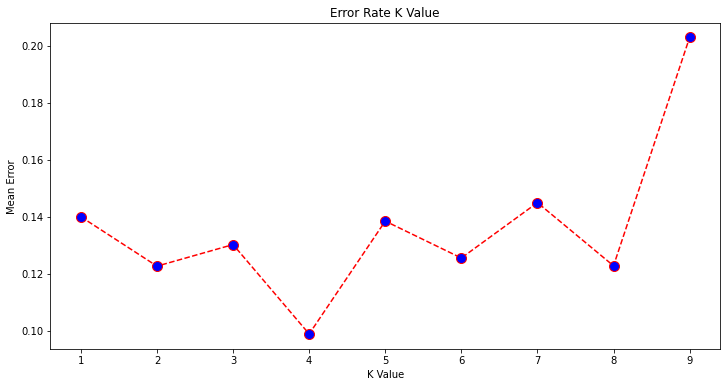

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [32]:
# Hiperparametro do nosos modelo é o número de vizinhos considerado (n_neighbors)
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

In [66]:
# Está fazendo o treinamento do meu modelo de ML
modelo_classificador.fit(x_train_escalonado, y_train)

KNeighborsClassifier()

In [67]:
y_predito = modelo_classificador.predict(x_test_escalonado) #defininfo as predições

Checando questões de overfitting and underfitting:

In [35]:
#print('Training set score: {:.4f}'.format(modelo_classificador.score(x_train, y_train)))
#print('Test set score: {:.4f}'.format(modelo_classificador.score(x_test, y_test)))

### Analisando resultados

In [68]:
# Acurácia do modelo
print(accuracy_score(y_test, y_predito))

0.9707976097687712
